In [ ]:
import pandas as pd

# csv file
df = pd.read_csv('/content/mental_health_dataset.csv')

# filter out rows where gender is 'Male'
df = df[df['Gender'] != 'Male']

# only keep relevant columns
columns_to_keep = ['Gender', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings']
df = df[columns_to_keep]

# assign dummy vars to Days_Indoors
days_indoors_mapping = {
    'Go out Every day': 0,
    '1-14 days': 1,
    '15-30 days': 2,
    '31-60 days': 3,
    'More than 2 months': 4
}
df['Days_Indoors'] = df['Days_Indoors'].map(days_indoors_mapping)

#  dummy vars for other columns
categorical_mappings = {
    'Gender': {'Female': 0},
    'family_history': {'Yes': 1, 'No': 0},
    'treatment': {'Yes': 1, 'No': 0},
    'Growing_Stress': {'Yes': 1, 'No': 0},
    'Changes_Habits': {'Yes': 1, 'No': 0},
    'Mood_Swings': {'Low': 0, 'Medium': 1, 'High': 2}
}

# apply dummy vars to each column
for col, mapping in categorical_mappings.items():
    df[col] = df[col].map(mapping)

# drop rows with NaN values
df.dropna(inplace=True)

# convert all columns to integer dtype
df = df.astype(int)

# display the modified DataFrame
display(df)

<ipython-input-1-499d8026c513>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Days_Indoors'] = df['Days_Indoors'].map(days_indoors_mapping)
<ipython-input-1-499d8026c513>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(mapping)
<ipython-input-1-499d8026c513>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Gender,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mood_Swings
0,0,0,1,1,1,0,1
1,0,1,1,1,1,0,1
2,0,1,1,1,1,0,1
3,0,1,1,1,1,0,1
4,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...
52509,0,0,1,2,0,0,0
52510,0,0,1,2,0,0,0
52511,0,1,0,2,0,0,0
52512,0,1,1,2,0,0,0


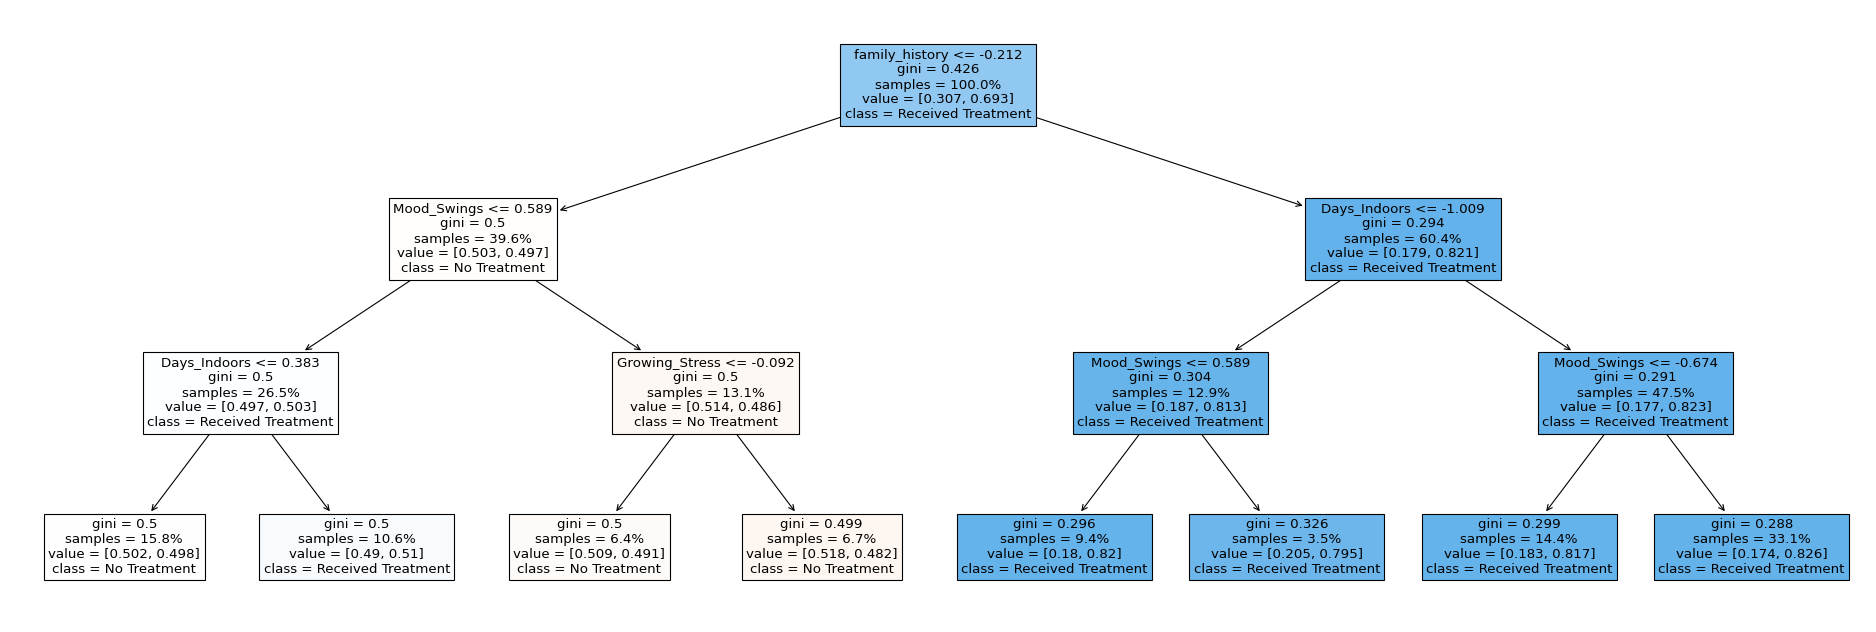

In [ ]:
# Training Model: Decision Tree

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Set x and y
y = df['treatment']
X = df[['family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings']]

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model
clf = DecisionTreeClassifier(criterion="gini", random_state=50, min_samples_split=4, max_depth=3)
model = clf.fit(X_train_scaled, y_train)

# Plot tree
plt.figure(figsize=(30, 10), dpi=80)
plot_tree(model, feature_names=X.columns, class_names=['No Treatment', 'Received Treatment'], filled=True, proportion=True, fontsize=12)
plt.show()




Accuracy: 0.6878169110593395


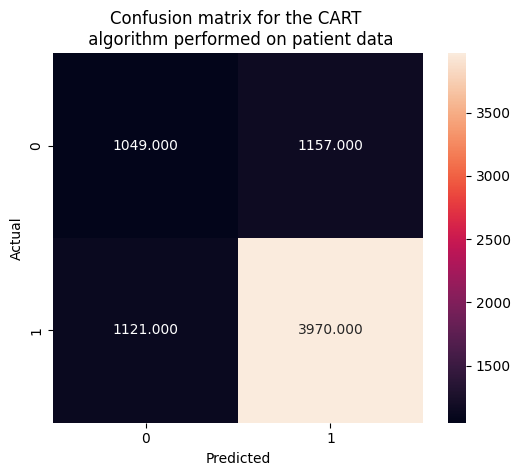

In [ ]:
#predict x test values
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#get confusion matrix
conf = metrics.confusion_matrix(y_test, y_pred)

#generate confusion matrix using heat maps
sns.heatmap(conf, annot=True, fmt=".3f", square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for the CART \n algorithm performed on patient data')


print("Accuracy:", accuracy_score(y_test, y_pred))